# Estudo do COVID-19 no Ceará
*Luís Eduardo Pompeu de Sousa Brasil Háteras*

* API Dataset: https://brasil.io/api/dataset/covid19/caso/data


* Planilha com Dados Oficiais do Ministério da Saúde: https://docs.google.com/spreadsheets/d/1vSxIPmqUbYTyLLM4eNddfU6CT2loAcWVQ0NX-gItceU/edit#gid=0


* Código Estados IBGE: https://atendimento.tecnospeed.com.br/hc/pt-br/articles/360021494734-Tabela-de-C%C3%B3digo-de-UF-do-IBGE

### 1.1 - Extração dos dados dos estados:

In [48]:
import json
import requests
from operator import itemgetter
import csv

# Saber a última página a ser filtrada
global pagina_final
pagina_final = 1
check = 1
for i in range(1,100):
    response = requests.get('https://brasil.io/api/dataset/covid19/caso/data?format=json&json=%22results%22&page=' + str(i))
    if response.status_code!=200:
        pagina_final=check
        break
    else:
        check=check+1

# Converter lista para CSV
def convert_csv(lista):
    with open('export.csv', 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(lista)

# Função para extrair dados da API por estado.
def extrair(city_ibge_code):
    dados=[]
    for i in range(1,pagina_final):
        response = requests.get('https://brasil.io/api/dataset/covid19/caso/data?format=json&json=%22results%22&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['city_ibge_code']==city_ibge_code:
                dados.append(element)    
    return(dados)

# Função para extrair último dado de todos estados
def last_data():
    nome_estado = []
    casos_estado = []
    casos_estado_100k = []
    mortes_estado = []
    rate_morte = []
    combinacao = []
    data_estado = []
    for i in range(1,pagina_final):
        response = requests.get('https://brasil.io/api/dataset/covid19/caso/data?format=json&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['place_type']=='state' and element['is_last']==True:
                data_estado.append(element['date'])
                nome_estado.append(element['state'])
                casos_estado.append(element['confirmed'])
                casos_estado_100k.append(element['confirmed_per_100k_inhabitants'])
                mortes_estado.append(element['deaths'])
                if element['death_rate']==None:
                    rate_morte.append('0')
                if element['death_rate']!=None:
                    rate_morte.append("{:.3f}".format(100*float(element['death_rate'])))                 
                
    combinacao.extend([list(i) for i in zip(nome_estado, casos_estado, casos_estado_100k, mortes_estado, rate_morte, data_estado)])
    combinacao = sorted(combinacao, key=itemgetter(1), reverse=True)
    return(combinacao)

def cidades_CE():
    nome_estado = []
    casos_estado = []
    casos_estado_100k = []
    mortes_estado = []
    rate_morte = []
    combinacao = []
    data_estado = []
    for i in range(1,pagina_final):
        response = requests.get('https://brasil.io/api/dataset/covid19/caso/data?format=json&page=' + str(i))
        content = json.loads(response.text)
        for element in content['results']:
            if element['place_type']=='city' and element['state']=='CE' and element['is_last']==True:
                data_estado.append(element['date'])
                nome_estado.append(element['city'])
                casos_estado.append(element['confirmed'])
                casos_estado_100k.append(element['confirmed_per_100k_inhabitants'])
                mortes_estado.append(element['deaths'])
                if element['death_rate']==None:
                    rate_morte.append('0')
                if element['death_rate']!=None:
                    rate_morte.append("{:.3f}".format(100*float(element['death_rate']))) 
    combinacao.extend([list(i) for i in zip(nome_estado, casos_estado, casos_estado_100k, mortes_estado, rate_morte, data_estado)])
    combinacao = sorted(combinacao, key=itemgetter(1), reverse=True)
    return(combinacao)

def taxa_crescimento(dados):  
    data = []
    novos_casos = []
    casos = []
    percentual = []
    combinacao = []
    for i in range(0,len(dados)):
        try:
            casos.append(dados[i]['confirmed'])
            data.append(dados[i]['date'])
            resultado = dados[i]['confirmed'] - dados[i+1]['confirmed']
            novos_casos.append(resultado)
            percentuals = 100*resultado/dados[i+1]['confirmed']
            percentuals = "%.2f" % round(percentuals, 2)
            percentual.append(percentuals)
        except IndexError:
            casos.append(dados[i]['confirmed'])
            data.append(dados[i]['date'])
            novos_casos.append(dados[i]['confirmed'])
            percentual.append(0)
            
    combinacao.extend([list(i) for i in zip(data, casos, novos_casos, percentual)])
    combinacao = sorted(combinacao, key=itemgetter(0), reverse=True)
    return(combinacao)   

    

# INSERIR DADOS QUE FALTAVAM NA API
# ---------------------------- CEARÁ ------------------------
# Lista com dados do Ceará
dadosCE=[]
dadosCE=extrair('23')
# Como o primeiro caso (15/03/2020) estava faltando na lista, então, foi adicionado manualmente:
dadosCE.insert(len(dadosCE),{'city': None,
 'city_ibge_code': '23',
 'confirmed': 3,
 'confirmed_per_100k_inhabitants': 0.032851,
 'date': '2020-03-15',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 9132078,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'CE'})
# As vezes dá problema na posição da data, então, isso corrige
dadosCE.sort(key=lambda item:item['date'], reverse=True)


# ---------------------------- SÃO PAULO ------------------------
dadosSP=[]
dadosSP=extrair('35')
# 13/03 faltando para SP adicionado manualmente
dadosSP.insert(17,{'city': None,
 'city_ibge_code': '35',
 'confirmed': 56,
 'confirmed_per_100k_inhabitants': 0.121954,
 'date': '2020-03-13',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 45919049,
 'is_last': False,
 'order_for_place': 17,
 'place_type': 'state',
 'state': 'SP'})
# 15/03 faltando para SP adicionado manualmente
dadosSP.insert(16,{'city': None,
 'city_ibge_code': '35',
 'confirmed': 136,
 'confirmed_per_100k_inhabitants': 0.296173,
 'date': '2020-03-15',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 45919049,
 'is_last': False,
 'order_for_place': 16,
 'place_type': 'state',
 'state': 'SP'})
dadosSP.sort(key=lambda item:item['date'], reverse=True)



# ---------------------------- RIO DE JANEIRO ------------------------
dadosRJ=[]
dadosRJ=extrair('33')
dadosRJ.insert(16,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 2,
 'confirmed_per_100k_inhabitants': 0.0115842,
 'date': '2020-03-07',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 16,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(15,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 8,
 'confirmed_per_100k_inhabitants': 0.0463367,
 'date': '2020-03-09',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 15,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(15,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 8,
 'confirmed_per_100k_inhabitants': 0.0463367,
 'date': '2020-03-10',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 15,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(15,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 13,
 'confirmed_per_100k_inhabitants': 0.0752971,
 'date': '2020-03-11',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 15,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(14,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 19,
 'confirmed_per_100k_inhabitants': 0.11005,
 'date': '2020-03-13',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 14,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(14,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 24,
 'confirmed_per_100k_inhabitants': 0.13901,
 'date': '2020-03-14',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 14,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(12,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 33,
 'confirmed_per_100k_inhabitants': 0.191139,
 'date': '2020-03-17',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 12,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.insert(10,{'city': None,
 'city_ibge_code': '33',
 'confirmed': 109,
 'confirmed_per_100k_inhabitants': 0.631337,
 'date': '2020-03-20',
 'death_rate': 0.01835,
 'deaths': 2,
 'estimated_population_2019': 17264943,
 'is_last': False,
 'order_for_place': 10,
 'place_type': 'state',
 'state': 'RJ'})
dadosRJ.sort(key=lambda item:item['date'], reverse=True)

# ---------------------------- DISTRITO FEDERAL ------------------------
dadosDF=[]
dadosDF=extrair('53')
dadosDF.insert(13,{'city': None,
 'city_ibge_code': '53',
 'confirmed': 26,
 'confirmed_per_100k_inhabitants': 0.862278,
 'date': '2020-03-17',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 3015268,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'DF'})
dadosDF.sort(key=lambda item:item['date'], reverse=True)

# ---------------------------- MINAS GERAIS ------------------------
dadosMG=[]
dadosMG=extrair('31')
dadosMG.insert(15,{'city': None,
 'city_ibge_code': '31',
 'confirmed': 4,
 'confirmed_per_100k_inhabitants': 0.018896,
 'date': '2020-03-15',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 21168791,
 'is_last': False,
 'order_for_place': 15,
 'place_type': 'state',
 'state': 'MG'})
dadosMG.sort(key=lambda item:item['date'], reverse=True)

# ---------------------------- PERNAMBUCO --------------------------
dadosPE=[]
dadosPE=extrair('26')

# ---------------------------- ACRE --------------------------
dadosAC=[]
dadosAC=extrair('12')

# ---------------------------- MARANHÃO --------------------------
dadosMA=[]
dadosMA=extrair('21')

# ---------------------------- AMAZONAS --------------------------
dadosAM=[]
dadosAM=extrair('13')
dadosAM.insert(13,{'city': None,
 'city_ibge_code': '13',
 'confirmed': 1,
 'confirmed_per_100k_inhabitants': 0.0241278,
 'date': '2020-03-14',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 4144597,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'AM'})
dadosAM.insert(13,{'city': None,
 'city_ibge_code': '13',
 'confirmed': 1,
 'confirmed_per_100k_inhabitants': 0.0241278,
 'date': '2020-03-15',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 4144597,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'AM'})
dadosAM.insert(13,{'city': None,
 'city_ibge_code': '13',
 'confirmed': 1,
 'confirmed_per_100k_inhabitants': 0.0241278,
 'date': '2020-03-16',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 4144597,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'AM'})
dadosAM.insert(13,{'city': None,
 'city_ibge_code': '13',
 'confirmed': 2,
 'confirmed_per_100k_inhabitants': 0.0482556,
 'date': '2020-03-17',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 4144597,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'AM'})
dadosAM.sort(key=lambda item:item['date'], reverse=True)

# ---------------------------- R.G. SUL --------------------------
dadosRS=[]
dadosRS=extrair('43')
dadosRS.insert(14,{'city': None,
 'city_ibge_code': '43',
 'confirmed': 7,
 'confirmed_per_100k_inhabitants': 0.06152635,
 'date': '2020-03-14',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 11377239,
 'is_last': False,
 'order_for_place': 14,
 'place_type': 'state',
 'state': 'RS'})
dadosRS.insert(14,{'city': None,
 'city_ibge_code': '43',
 'confirmed': 7,
 'confirmed_per_100k_inhabitants': 0.06152635,
 'date': '2020-03-15',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 11377239,
 'is_last': False,
 'order_for_place': 14,
 'place_type': 'state',
 'state': 'RS'})
dadosRS.insert(13,{'city': None,
 'city_ibge_code': '43',
 'confirmed': 19,
 'confirmed_per_100k_inhabitants': 0.167000095,
 'date': '2020-03-17',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 11377239,
 'is_last': False,
 'order_for_place': 13,
 'place_type': 'state',
 'state': 'RS'})
dadosRS.sort(key=lambda item:item['date'], reverse=True)

# ---------------------------- PIAUÍ --------------------------
dadosPI=[]
dadosPI=extrair('22')
dadosPI.insert(7,{'city': None,
 'city_ibge_code': '22',
 'confirmed': 6,
 'confirmed_per_100k_inhabitants': 0.183305,
 'date': '2020-03-23',
 'death_rate': None,
 'deaths': 0,
 'estimated_population_2019': 3273227,
 'is_last': False,
 'order_for_place': 7,
 'place_type': 'state',
 'state': 'PI'})
dadosPI.insert(2,{'city': None,
 'city_ibge_code': '22',
 'confirmed': 16,
 'confirmed_per_100k_inhabitants': 0.48881425,
 'date': '2020-03-29',
 'death_rate': 0.0625,
 'deaths': 1,
 'estimated_population_2019': 3273227,
 'is_last': False,
 'order_for_place': 2,
 'place_type': 'state',
 'state': 'PI'})
dadosPI.sort(key=lambda item:item['date'], reverse=True)

#------------- FORTALEZA -------------------
dadosFTZ = extrair('2304400')

# Últimos dados dos estados na ordem - ESTADO, NÚMERO DE CASOS, CASOS POR 100K HABITANTES, MORTES, TAXA MORTALIDADE
lista_estados = last_data()

# Últimos dados das cidades do Ceará
cidades_ceara = cidades_CE()
convert_csv(cidades_ceara)

# Dados de São Paulo Capital
dadosSPZ = extrair('3550308')

In [69]:
import pandas as pd
import json

# Corrigir erros no Ceará
df21 = pd.DataFrame(dadosCE)

# 05/04
df21.at[7, 'confirmed'] = 824
df21.at[7, 'confirmed_per_100k_inhabitants'] = 9.023138
df21.at[7, 'deaths'] = 26
df21.at[7, 'death_rate'] = 0.0315534

# 06/04
df21.at[6, 'confirmed'] = 1023
df21.at[6, 'confirmed_per_100k_inhabitants'] = 11.20227
df21.at[6, 'deaths'] = 31
df21.at[6, 'death_rate'] = 0.030303030

# 08/04
df21.at[4, 'confirmed'] = 1376
df21.at[4, 'confirmed_per_100k_inhabitants'] = 15.07
df21.at[4, 'deaths'] = 53
df21.at[4, 'death_rate'] = 0.0385174419


dadosCE = df21.to_json(orient='records')
dadosCE = json.loads(dadosCE)



#### 1.2 - Extração de dados Brasil (nacional):

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# DADOS BRASIL
# Lendo os dados do Brasil
data = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

#Filtrando os dados nacionais
dados_brasil = data[data.state == 'TOTAL']

# Adicionando os que faltam
'''
df2 = pd.DataFrame({"date":['2020-02-26', '2020-02-27', '2020-02-28', '2020-03-01', '2020-03-02', '2020-03-03'], 
                    "country":['Brazil', 'Brazil','Brazil','Brazil','Brazil','Brazil'],
                    "state":['TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL'],
                    "city":['TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL'],
                    "deaths":[0,0,0,0,0,0],
                    "newCases":[1,0,0,0,0,0],
                    "totalCases":[1,1,1,2,2,2]}) 
'''

# Inserindo no dataframe
#dados_brasil=dados_brasil.append(df2, ignore_index = True) 

# Organizando por data
dados_brasil = dados_brasil.sort_values(by='date')

# Adicionando casos por 100k habitantes e taxa de mortalidade
dados_brasil['totalCases_100k'] = dados_brasil['totalCases'].div(211324628)*100000
dados_brasil['death_rate'] = dados_brasil['deaths']/dados_brasil['totalCases']

# Visualização do Dataframe
#dadosBR.sort(key=lambda item:item['date'], reverse=True)
dados_brasil = dados_brasil.reset_index(drop=True)


# Correções no dataframe
#dados_brasil.loc[3, 'totalCases']=2
#dados_brasil.loc[3, 'newCases']=1
#dados_brasil.loc[4, 'newCases']=0
#dados_brasil.loc[1, 'newCases']=0
dados_brasil.drop(columns=['city', 'state'], inplace=True)

# Forçar uma formatação padrão
dados_brasil = dados_brasil[['date', 'country', 'totalCases', 'totalCasesMS', 'newCases', 'totalCases_100k','deaths',
                             'deathsMS','newDeaths','death_rate']]

dados_brasil.fillna(0, inplace=True)

# Convertendo em lista
dadosBR = dados_brasil.values.tolist()


# Crescimento percentual dos casos no Brasil
crescimentoBR=[]   
crescimentotetBR = []
datacresBR = []
novoscasosBRl=[]
for i in range(1, len(dados_brasil)):
    try:
        #print(dados_brasil.loc[i, 'date'])
        #print(dados_brasil.loc[i, 'totalCases'])
        novoscasosBR=dados_brasil.loc[i+1, 'totalCases']-dados_brasil.loc[i, 'totalCases']
        novoscasosBRl.append(novoscasosBR)
        teste = 100*novoscasosBR/dados_brasil.loc[i, 'totalCases']
        crescimentotetBR.append(str(teste))
        #print(str(teste))
        datacresBR.append(dados_brasil.loc[i+1, 'date'])
    except:
        pass    
crescimentoBR.extend([list(i) for i in zip(datacresBR, crescimentotetBR, novoscasosBRl)])   


dados_brasil


,date,country,totalCases,totalCasesMS,newCases,totalCases_100k,deaths,deathsMS,newDeaths,death_rate
0,2020-02-25,Brazil,1,0,1,0.000473,0,0,0,0.000000
1,2020-02-26,Brazil,1,1,0,0.000473,0,0,0,0.000000
2,2020-02-27,Brazil,1,1,0,0.000473,0,0,0,0.000000
3,2020-02-28,Brazil,2,1,1,0.000946,0,0,0,0.000000
4,2020-02-29,Brazil,2,2,0,0.000946,0,0,0,0.000000
5,2020-03-01,Brazil,2,2,0,0.000946,0,0,0,0.000000
6,2020-03-02,Brazil,2,2,0,0.000946,0,0,0,0.000000
7,2020-03-03,Brazil,2,2,0,0.000946,0,0,0,0.000000
8,2020-03-04,Brazil,3,3,1,0.001420,0,0,0,0.000000
9,2020-03-05,Brazil,7,7,4,0.003312,0,0,0,0.000000


In [4]:
# Últimos dados dos estados na ordem - ESTADO, NÚMERO DE CASOS, CASOS POR 100K HABITANTES, MORTES, TAXA MORTALIDADE
cidades_ceara

[['Fortaleza', 1529, 57.28003, 59, '3.860', '2020-04-12'],
 ['Aquiraz', 29, 36.12762, 0, '0', '2020-04-12'],
 ['Caucaia', 26, 7.19424, 1, '3.850', '2020-04-12'],
 ['Importados/Indefinidos', 21, None, 0, '0', '2020-04-12'],
 ['Maracanaú', 21, 9.21513, 1, '4.760', '2020-04-12'],
 ['Sobral', 14, 6.70065, 0, '0', '2020-04-12'],
 ['Iguatu', 8, 7.80503, 3, '37.500', '2020-04-12'],
 ['Horizonte', 7, 10.39547, 1, '14.290', '2020-04-12'],
 ['Quixadá', 7, 7.97921, 0, '0', '2020-04-12'],
 ['Eusébio', 5, 9.32523, 2, '40.000', '2020-04-12'],
 ['Jaguaribe', 5, 14.4167, 1, '20.000', '2020-04-12'],
 ['Quixeramobim', 5, 6.1666, 1, '20.000', '2020-04-12'],
 ['Itaitinga', 4, 10.53186, 1, '25.000', '2020-04-12'],
 ['Icó', 3, 4.4106, 0, '0', '2020-04-12'],
 ['Juazeiro do Norte', 3, 1.09406, 0, '0', '2020-04-12'],
 ['Limoeiro do Norte', 3, 5.03863, 1, '33.330', '2020-04-12'],
 ['Maranguape', 3, 2.32598, 0, '0', '2020-04-12'],
 ['Mombaça', 3, 6.84978, 0, '0', '2020-04-12'],
 ['Tianguá', 3, 3.95018, 1, '33.33

### 2 - Estatísticas Nacionais

Os dados estão na ordem: 
ESTADO, NÚMERO DE CASOS, CASOS POR 100.000 HABITANTES, MORTES, TAXA MORTALIDADE (%) E DATA DO ÚLTIMO REGISTRO

#### 2.1 - Estados ordenados por número de casos confirmados:

In [5]:
lista_estados

[['SP', 8755, 19.06616, 588, '6.720', '2020-04-12'],
 ['RJ', 2855, 16.5364, 170, '5.950', '2020-04-12'],
 ['CE', 1747, 19.13037, 76, '4.350', '2020-04-12'],
 ['AM', 1206, 29.09812, 62, '5.140', '2020-04-12'],
 ['PE', 960, 10.04492, 85, '8.850', '2020-04-12'],
 ['MG', 815, 3.85001, 23, '2.820', '2020-04-13'],
 ['SC', 776, 10.83075, 24, '3.090', '2020-04-12'],
 ['PR', 768, 6.71683, 33, '4.300', '2020-04-13'],
 ['BA', 674, 4.53168, 21, '3.120', '2020-04-12'],
 ['RS', 664, 5.83621, 16, '2.410', '2020-04-12'],
 ['DF', 618, 20.49569, 14, '2.270', '2020-04-12'],
 ['MA', 445, 6.28959, 27, '6.070', '2020-04-12'],
 ['ES', 430, 10.70011, 14, '3.260', '2020-04-12'],
 ['RN', 339, 9.66679, 17, '5.010', '2020-04-12'],
 ['PA', 259, 3.01062, 14, '5.410', '2020-04-12'],
 ['AP', 237, 28.02309, 5, '2.110', '2020-04-12'],
 ['GO', 229, 3.26287, 14, '6.110', '2020-04-12'],
 ['MT', 123, 3.52995, 3, '2.440', '2020-04-12'],
 ['PB', 111, 2.76248, 13, '11.710', '2020-04-12'],
 ['MS', 101, 3.63442, 2, '1.980', '20

#### 2.2 - Estados ordenados por casos confirmados por 100 mil habitantes:

In [6]:
sorted(lista_estados, key=itemgetter(2), reverse=True)

[['AM', 1206, 29.09812, 62, '5.140', '2020-04-12'],
 ['AP', 237, 28.02309, 5, '2.110', '2020-04-12'],
 ['DF', 618, 20.49569, 14, '2.270', '2020-04-12'],
 ['CE', 1747, 19.13037, 76, '4.350', '2020-04-12'],
 ['SP', 8755, 19.06616, 588, '6.720', '2020-04-12'],
 ['RJ', 2855, 16.5364, 170, '5.950', '2020-04-12'],
 ['RR', 83, 13.70177, 3, '3.610', '2020-04-12'],
 ['SC', 776, 10.83075, 24, '3.090', '2020-04-12'],
 ['ES', 430, 10.70011, 14, '3.260', '2020-04-12'],
 ['PE', 960, 10.04492, 85, '8.850', '2020-04-12'],
 ['RN', 339, 9.66679, 17, '5.010', '2020-04-12'],
 ['AC', 77, 8.7308, 2, '2.600', '2020-04-12'],
 ['PR', 768, 6.71683, 33, '4.300', '2020-04-13'],
 ['MA', 445, 6.28959, 27, '6.070', '2020-04-12'],
 ['RS', 664, 5.83621, 16, '2.410', '2020-04-12'],
 ['BA', 674, 4.53168, 21, '3.120', '2020-04-12'],
 ['MG', 815, 3.85001, 23, '2.820', '2020-04-13'],
 ['MS', 101, 3.63442, 2, '1.980', '2020-04-12'],
 ['MT', 123, 3.52995, 3, '2.440', '2020-04-12'],
 ['GO', 229, 3.26287, 14, '6.110', '2020-04

#### 2.3 - Estados ordenados por mortes confirmadas:

In [7]:
sorted(lista_estados, key=itemgetter(3), reverse=True)

[['SP', 8755, 19.06616, 588, '6.720', '2020-04-12'],
 ['RJ', 2855, 16.5364, 170, '5.950', '2020-04-12'],
 ['PE', 960, 10.04492, 85, '8.850', '2020-04-12'],
 ['CE', 1747, 19.13037, 76, '4.350', '2020-04-12'],
 ['AM', 1206, 29.09812, 62, '5.140', '2020-04-12'],
 ['PR', 768, 6.71683, 33, '4.300', '2020-04-13'],
 ['MA', 445, 6.28959, 27, '6.070', '2020-04-12'],
 ['SC', 776, 10.83075, 24, '3.090', '2020-04-12'],
 ['MG', 815, 3.85001, 23, '2.820', '2020-04-13'],
 ['BA', 674, 4.53168, 21, '3.120', '2020-04-12'],
 ['RN', 339, 9.66679, 17, '5.010', '2020-04-12'],
 ['RS', 664, 5.83621, 16, '2.410', '2020-04-12'],
 ['DF', 618, 20.49569, 14, '2.270', '2020-04-12'],
 ['ES', 430, 10.70011, 14, '3.260', '2020-04-12'],
 ['PA', 259, 3.01062, 14, '5.410', '2020-04-12'],
 ['GO', 229, 3.26287, 14, '6.110', '2020-04-12'],
 ['PB', 111, 2.76248, 13, '11.710', '2020-04-12'],
 ['PI', 51, 1.5581, 7, '13.730', '2020-04-12'],
 ['AP', 237, 28.02309, 5, '2.110', '2020-04-12'],
 ['SE', 44, 1.91413, 4, '9.090', '2020

#### 2.4 - Estados ordenados por taxa de mortalidade (%):

In [8]:
sorted(lista_estados, key=itemgetter(4), reverse=True)

[['SE', 44, 1.91413, 4, '9.090', '2020-04-11'],
 ['PE', 960, 10.04492, 85, '8.850', '2020-04-12'],
 ['SP', 8755, 19.06616, 588, '6.720', '2020-04-12'],
 ['AL', 48, 1.43826, 3, '6.250', '2020-04-12'],
 ['GO', 229, 3.26287, 14, '6.110', '2020-04-12'],
 ['MA', 445, 6.28959, 27, '6.070', '2020-04-12'],
 ['RJ', 2855, 16.5364, 170, '5.950', '2020-04-12'],
 ['PA', 259, 3.01062, 14, '5.410', '2020-04-12'],
 ['AM', 1206, 29.09812, 62, '5.140', '2020-04-12'],
 ['RN', 339, 9.66679, 17, '5.010', '2020-04-12'],
 ['RO', 42, 2.36323, 2, '4.760', '2020-04-12'],
 ['CE', 1747, 19.13037, 76, '4.350', '2020-04-12'],
 ['PR', 768, 6.71683, 33, '4.300', '2020-04-13'],
 ['RR', 83, 13.70177, 3, '3.610', '2020-04-12'],
 ['ES', 430, 10.70011, 14, '3.260', '2020-04-12'],
 ['BA', 674, 4.53168, 21, '3.120', '2020-04-12'],
 ['SC', 776, 10.83075, 24, '3.090', '2020-04-12'],
 ['MG', 815, 3.85001, 23, '2.820', '2020-04-13'],
 ['AC', 77, 8.7308, 2, '2.600', '2020-04-12'],
 ['MT', 123, 3.52995, 3, '2.440', '2020-04-12'],

### 3 - Comparativo do Ceará com Demais Estados

#### 3.1 - Número de Casos Confirmados: 

[1, 1, 1, 2, 2, 2, 2, 2, 3, 7, 14, 19, 25, 25, 34, 53, 89, 105, 141, 224, 278, 332, 514, 639, 972, 1204, 1594, 1952, 2255, 2562, 2990, 3476, 3955, 4313, 4663, 5824, 6931, 8100, 9212, 10378, 11424, 12262, 14083, 16258, 18195, 19937, 20992, 22457, 23661]


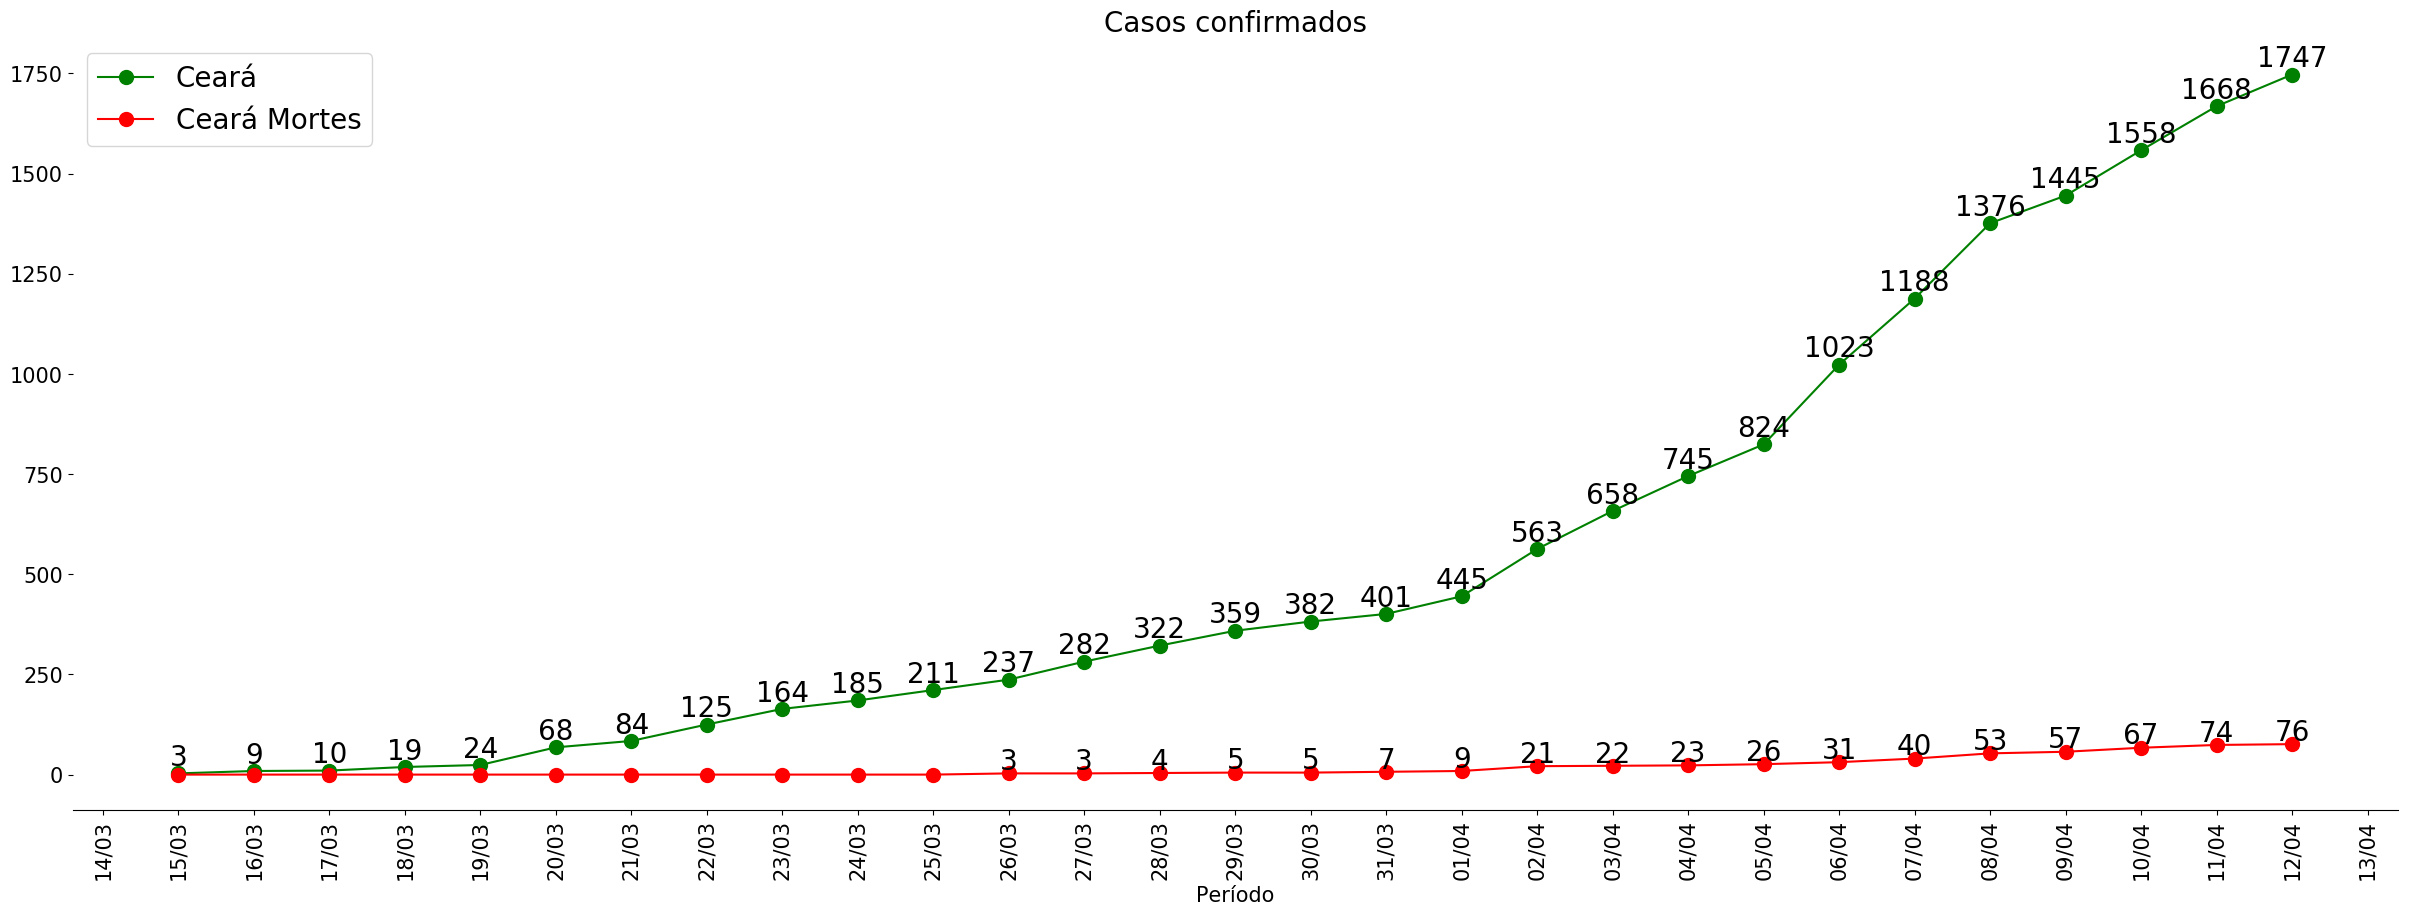

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
plt.style.use('default')

######## DATAS ########
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCE = [dadosCE[i]['confirmed'] for i in range(0, len(dadosCE))]

# Mortes Ceará
dataCEDEATH = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCEDEATH = [dadosCE[i]['deaths'] for i in range(0, len(dadosCE))]

#Fortaleza
dataFTZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosFTZ[i]['date'] for i in range(0, len(dadosFTZ))]]
casosFTZ = [dadosFTZ[i]['confirmed'] for i in range(0, len(dadosFTZ))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP))]]
casosSP = [dadosSP[i]['confirmed'] for i in range(0, len(dadosSP))]


# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ))]]
casosRJ = [dadosRJ[i]['confirmed'] for i in range(0, len(dadosRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
casosBR = [dadosBR[i][2] for i in range(0, len(dadosBR))]
print(casosBR)

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
#ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
#plt.ylabel('Número de casos confirmados', size = 15)
plt.title('Casos confirmados', size = 20)

# Inverte eixo-x
#plt.gca().invert_xaxis()

# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
plt.plot(dataCEDEATH, casosCEDEATH, marker='o', markersize=10, color="red", label='Ceará Mortes')
#plt.plot(dataFTZ, casosFTZ, marker='o', markersize=10, color="black", label='Fortaleza')
#plt.plot(dataBR[::-1][0:], casosBR[::-1][0:], marker='o', markersize=10, color="indigo", label='Brasil')


# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    ax.annotate(str(j),xy=(i,j+20), ha="center", size=20)
    
for i,j in zip(dataCEDEATH[:dataCEDEATH.index(datetime.strptime("2020-03-25","%Y-%m-%d").date())],casosCEDEATH[:dataCEDEATH.index(datetime.strptime("2020-03-25","%Y-%m-%d").date())]):
    ax.annotate(str(j),xy=(i,j+10), ha="center", size=20)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])


# Ajusta o eixo x e gira os valores
ax.tick_params(axis='x', rotation=90)

plt.legend(loc='best', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.2 - Impacto percentual de cada estado sobre os casos totais: 

[1.339, 3.237, 3.012, 3.696, 3.756, 6.996, 6.977, 7.842, 8.402, 8.204, 8.236, 7.926, 8.113, 8.142, 8.324, 8.192, 6.885, 6.42, 6.951, 7.143, 7.179, 8.403, 8.522, 8.436, 8.574, 7.942, 7.815, 7.946, 7.779]


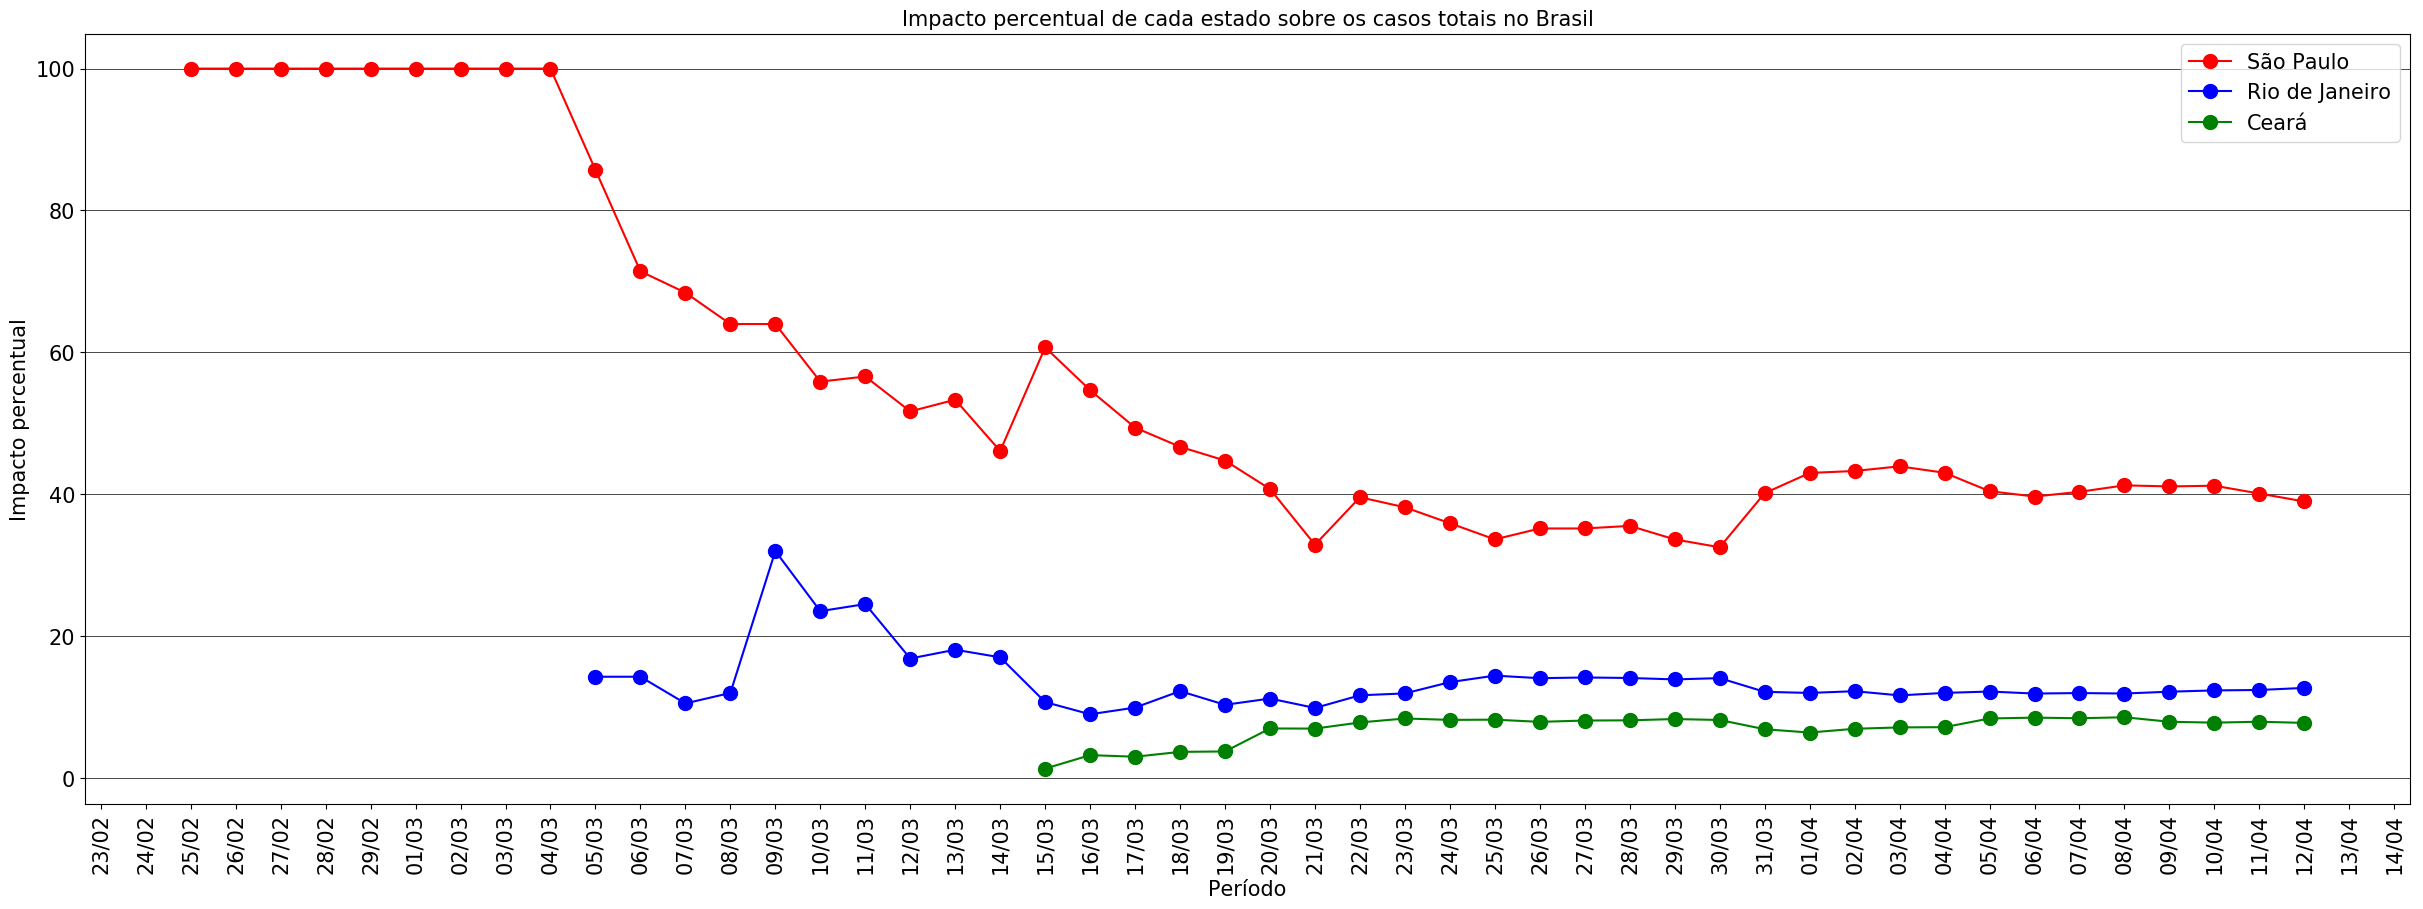

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Função para calcular o impacto percentual
def impacto_estado(dataestado, casosestado):
    data = []
    impacto = []
    combinacao = []
    for i in dataBR:
        for j in dataestado:
            if i==j:
                indexBR = dataBR.index(i)
                indexestado = dataestado.index(j)
                data.append(j)
                try:
                    impacto.append("{:.3f}".format(100*casosestado[indexestado]/casosBR[indexBR]))
                except ZeroDivisionError:
                    impacto.append(0)
                    
    combinacao.extend([list(i) for i in zip(data, impacto)])
    return(combinacao)
                
### Valores de impacto nos números totais de casos brasileiros    
impactosCE = impacto_estado(dataCE, casosCE)
impactosRJ = impacto_estado(dataRJ, casosRJ)
impactosSP = impacto_estado(dataSP, casosSP)


# Impacto CE
dataICE = [impactosCE[i][0] for i in range(0, len(impactosCE))]
casosICE = [float(impactosCE[i][1]) for i in range(0, len(impactosCE))]

# Impacto RJ
dataIRJ = [impactosRJ[i][0] for i in range(0, len(impactosRJ))]
casosIRJ = [float(impactosRJ[i][1]) for i in range(0, len(impactosRJ))]

# Impacto SP
dataISP = [impactosSP[i][0] for i in range(0, len(impactosSP))]
casosISP = [float(impactosSP[i][1]) for i in range(0, len(impactosSP))]

# Porcentagem dos impactos dos casos cearenses
print(casosICE)

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatando o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Impacto percentual', size = 15)
plt.title('Impacto percentual de cada estado sobre os casos totais no Brasil', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataISP, casosISP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataIRJ, casosIRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataICE, casosICE, marker='o', markersize=10, color="green", label='Ceará')

# Eixo x rotacionado 90 graus
ax.tick_params(axis='x', rotation=90)

# Legenda
plt.legend(loc='best', prop={"size":15})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.3 - Número de Casos Confirmados por 100 mil habitantes: 

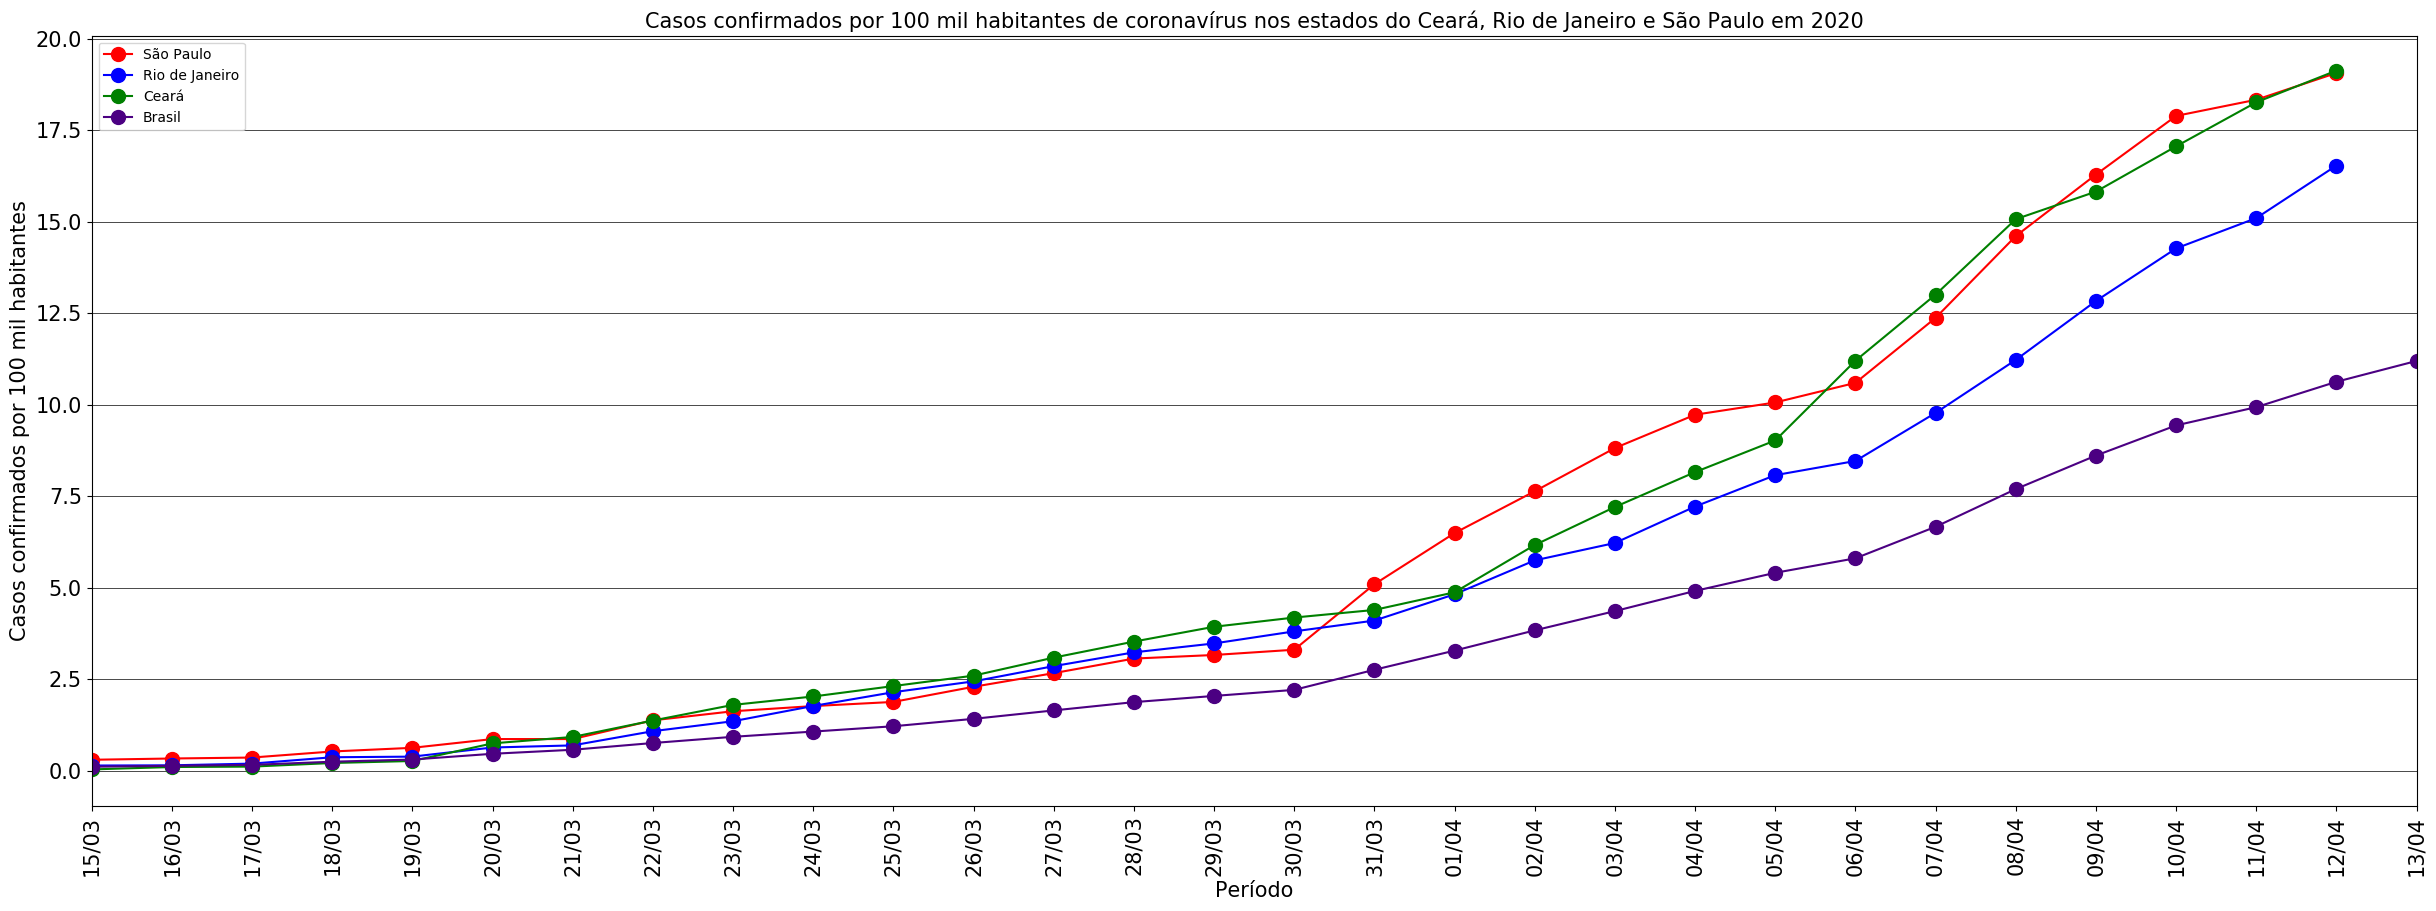

In [72]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE))]]
casosCE = [dadosCE[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosCE))]

#Fortaleza
dataFTZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosFTZ[i]['date'] for i in range(0, len(dadosFTZ))]]
casosFTZ = [dadosFTZ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosFTZ))]

#São Paulo Capital
dataSPZ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSPZ[i]['date'] for i in range(0, len(dadosSPZ))]]
casosSPZ = [dadosSPZ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosSPZ))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP))]]
casosSP = [dadosSP[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ))]]
casosRJ = [dadosRJ[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosRJ))]

# Distrito Federal
dataDF = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosDF[i]['date'] for i in range(0, len(dadosDF))]]
casosDF = [dadosDF[i]['confirmed_per_100k_inhabitants'] for i in range(0, len(dadosDF))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
casosBR = [dadosBR[i][5] for i in range(0, len(dadosBR))]


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Ajustando os limites do gráfico
ax.set(xlim=(datetime.strptime('2020-03-15', '%Y-%m-%d').date(), datetime.strptime('2020-04-13', '%Y-%m-%d').date()))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatando o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Casos confirmados por 100 mil habitantes', size = 15)
plt.title('Casos confirmados por 100 mil habitantes de coronavírus nos estados do Ceará, Rio de Janeiro e São Paulo em 2020', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataFTZ, casosFTZ, marker='o', markersize=10, color="black", label='Fortaleza')
#plt.plot(dataSPZ, casosSPZ, marker='o', markersize=10, color="yellow", label='São Paulo Capital')
#plt.plot(dataDF, casosDF, marker='o', markersize=10, color="pink", label='Distrito Federal')
plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

ax.tick_params(axis='x', rotation=90)

plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.4 - Taxa de mortalidade (%):

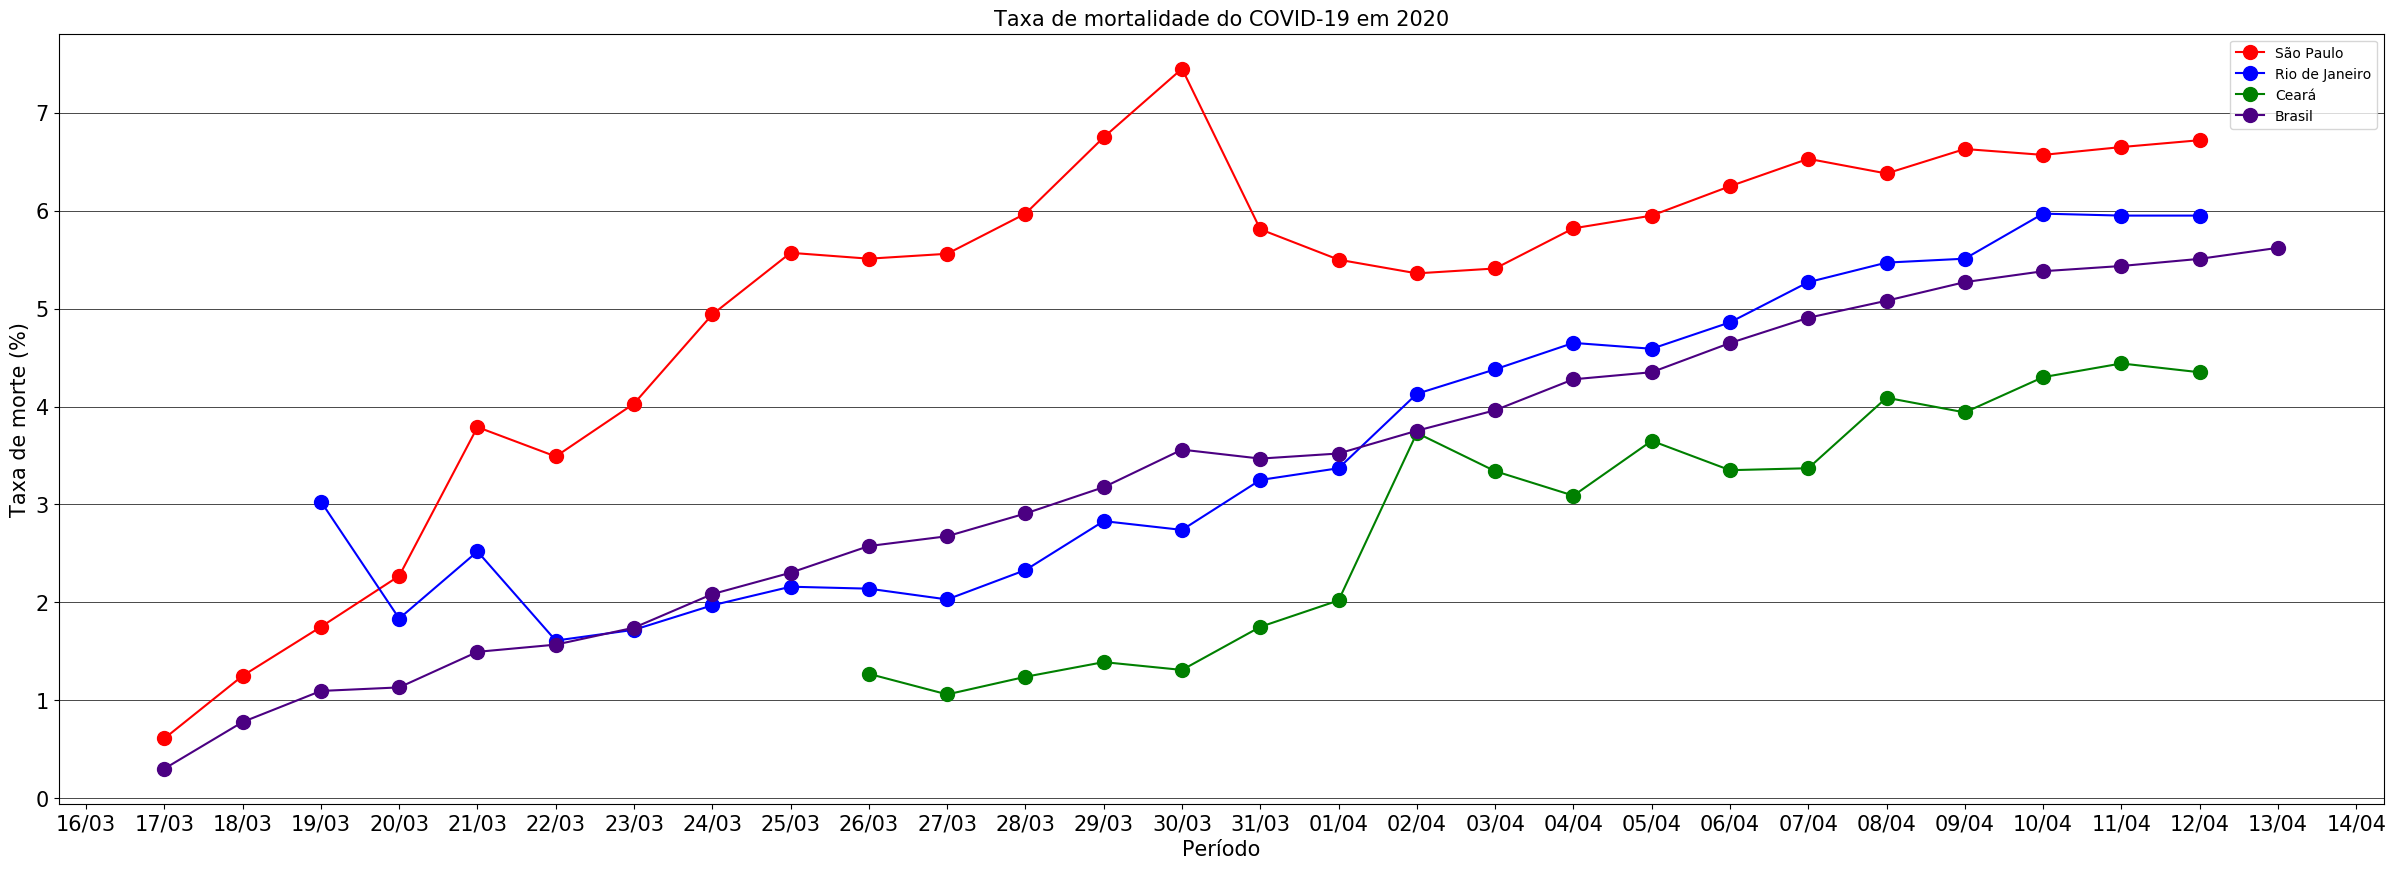

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosCE[i]['date'] for i in range(0, len(dadosCE)) if dadosCE[i]['death_rate']!=None]]
casosCE = [100*dadosCE[i]['death_rate'] for i in range(0, len(dadosCE)) if dadosCE[i]['death_rate']!=None]


# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosSP[i]['date'] for i in range(0, len(dadosSP)) if dadosSP[i]['death_rate']!=None]]
casosSP = [100*dadosSP[i]['death_rate'] for i in range(0, len(dadosSP)) if dadosSP[i]['death_rate']!=None]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosRJ[i]['date'] for i in range(0, len(dadosRJ)) if dadosRJ[i]['death_rate']!=None]]
casosRJ = [100*dadosRJ[i]['death_rate'] for i in range(0, len(dadosRJ)) if dadosRJ[i]['death_rate']!=None]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR)) if dadosBR[i][6]!=0]]
casosBR = [100*dadosBR[i][9] for i in range(0, len(dadosBR)) if dadosBR[i][6]!=0]

# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Taxa de morte (%)', size = 15)
plt.title('Taxa de mortalidade do COVID-19 em 2020', size = 15)

# Inverte eixo-x
#plt.gca().invert_xaxis()

# Plota os dados SP, RJ e CE, respectivamente
plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

# Deixa informacoes do eixo x paralelo ao eixo
ax.tick_params(axis='x', rotation=0)

plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.5 - Crescimento percentual do número de casos (%)

[4.74, 7.06, 7.82, 5.01, 15.82, 16.13, 24.15, 10.6, 13.22, 16.87, 26.52, 10.97, 4.97, 6.41, 11.49, 14.18, 18.99, 12.32, 14.05, 12.8, 31.2, 48.81, 23.53, 183.33, 26.32, 90.0, 11.11, 200.0, 0.0]


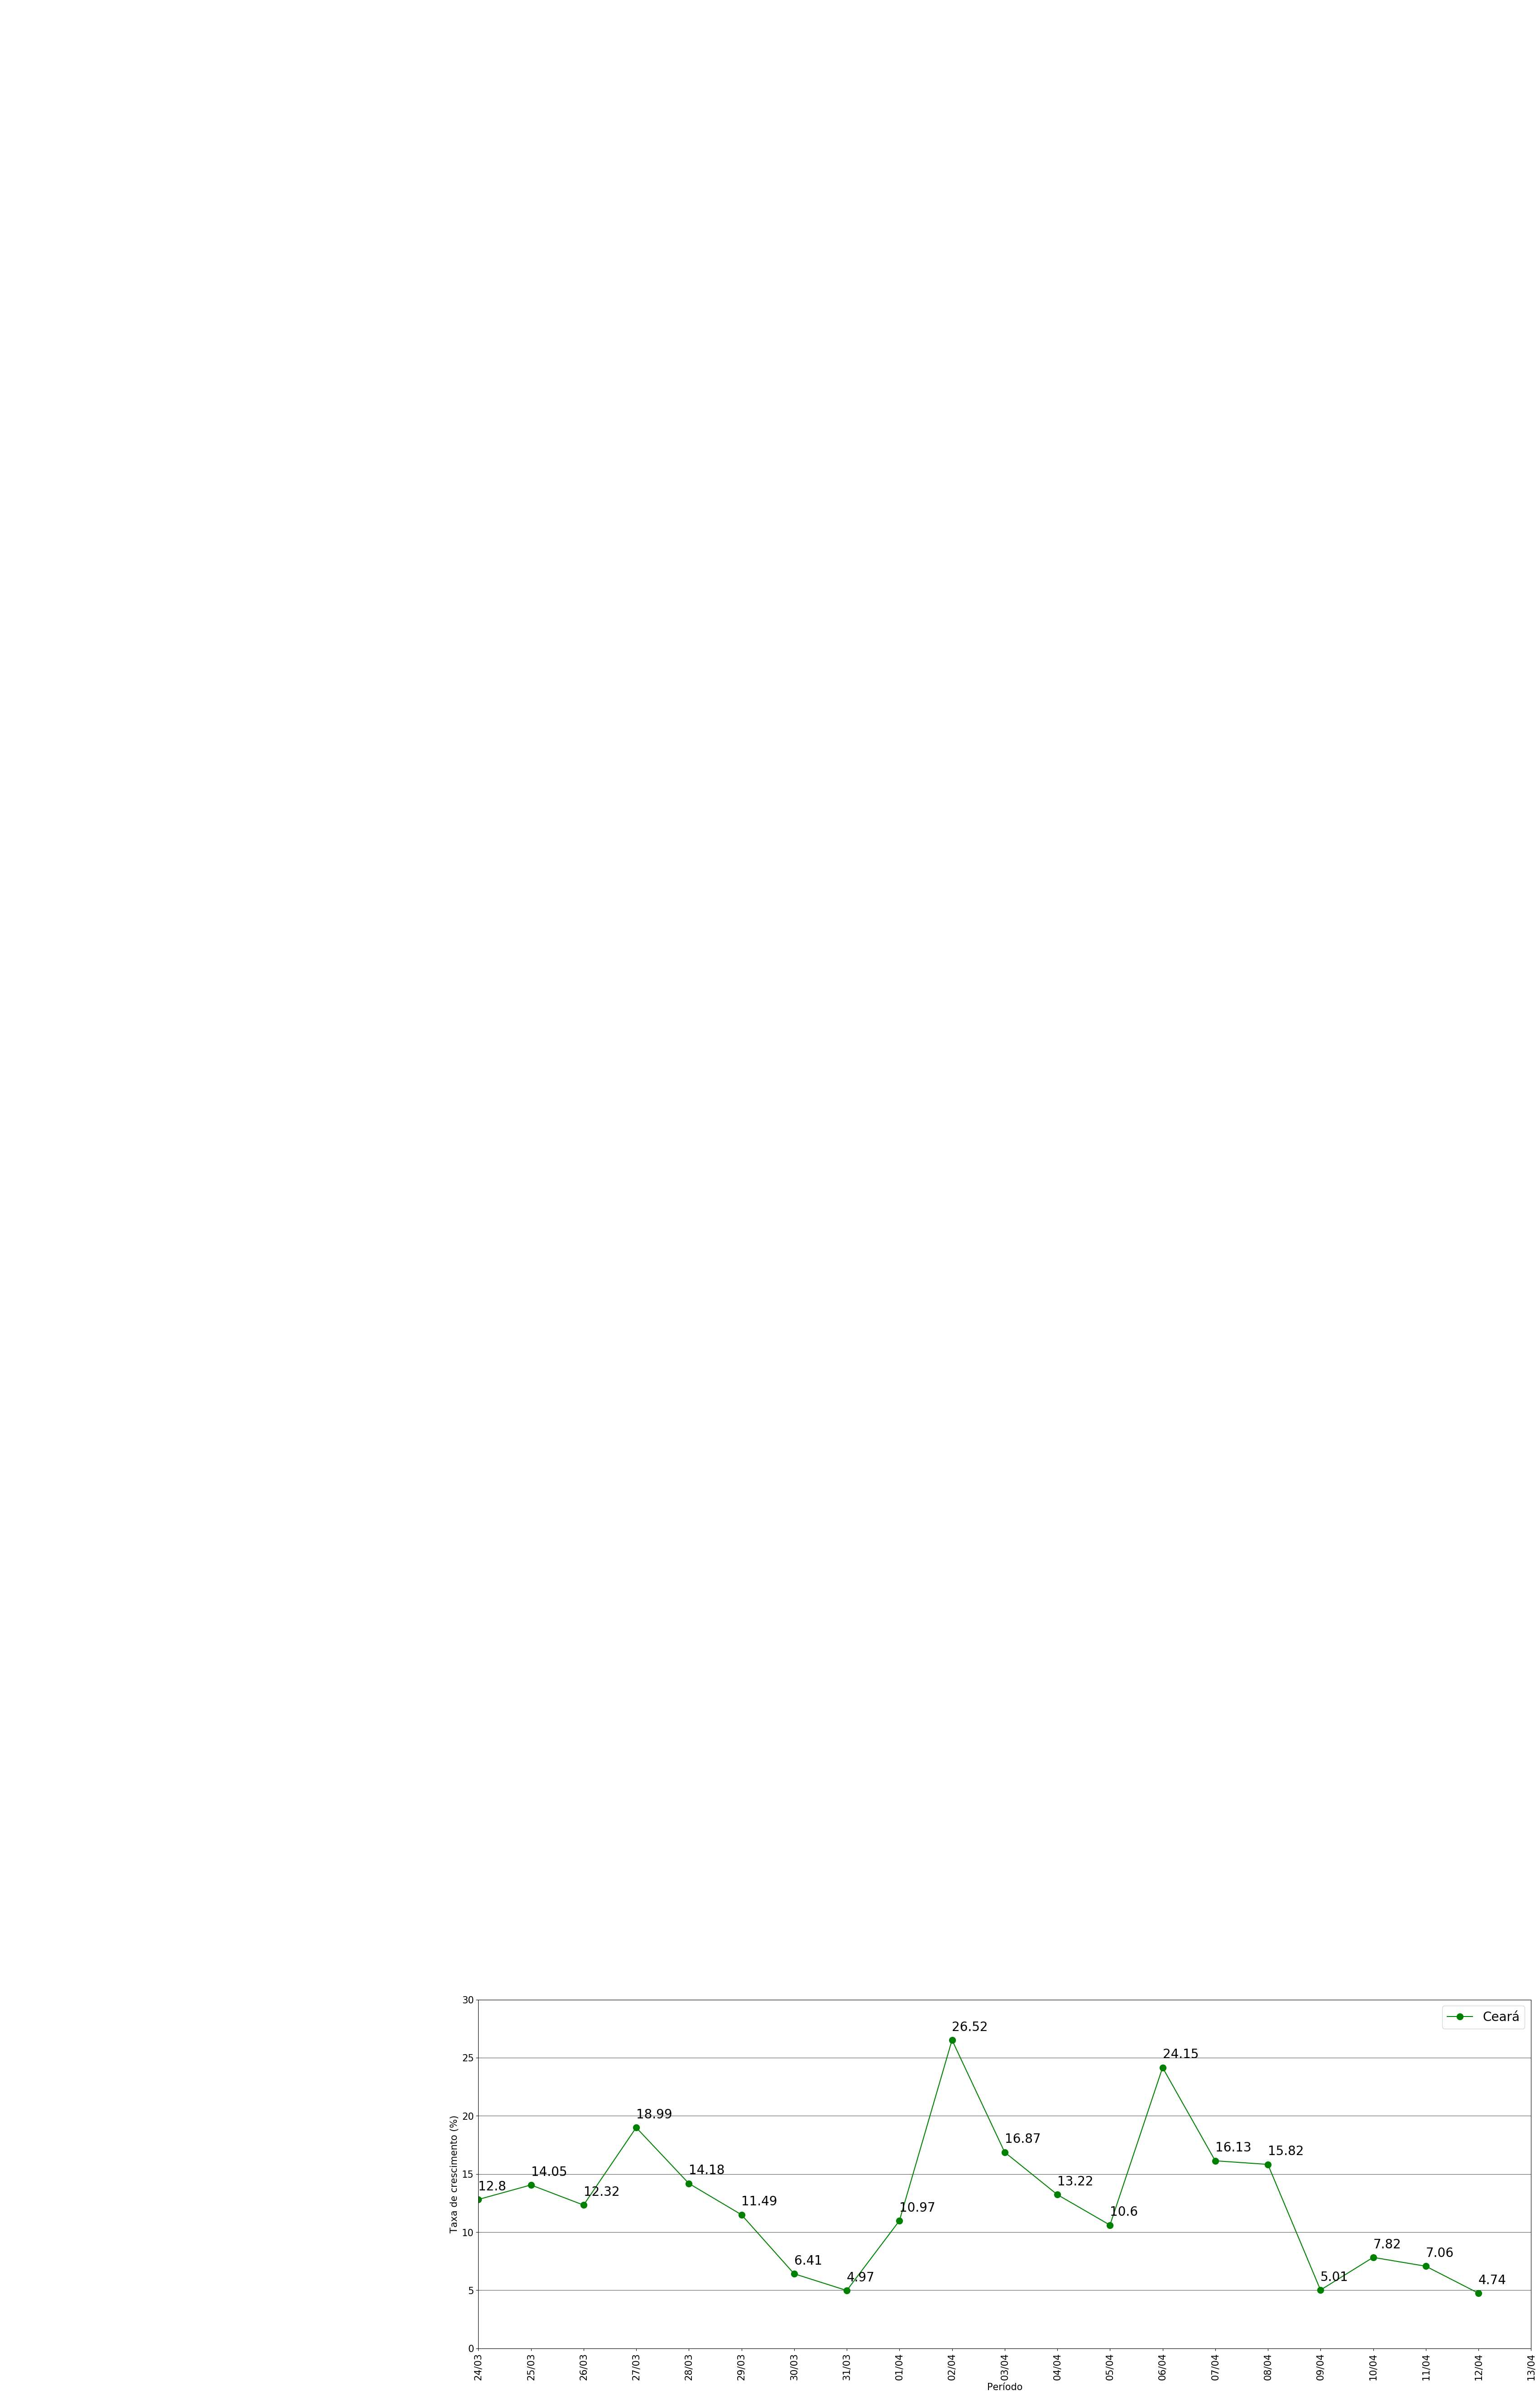

In [75]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates
from time import mktime
from adjustText import adjust_text

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
casosCE = [float(crescimentoCE[i][3]) for i in range(0, len(crescimentoCE))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
casosSP = [float(crescimentoSP[i][3]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
casosRJ = [float(crescimentoRJ[i][3]) for i in range(0, len(crescimentoRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoBR[i][0] for i in range(0, len(crescimentoBR))]]
casosBR = [float(crescimentoBR[i][1]) for i in range(0, len(crescimentoBR))]

print(casosCE)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Limite para eixo x e y
ax.set(xlim=(datetime.strptime('2020-03-24', '%Y-%m-%d').date(), datetime.strptime('2020-04-13', '%Y-%m-%d').date()))
ax.set_ylim([0,30])

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 15)
plt.ylabel('Taxa de crescimento (%)', size = 15)
#plt.title('Percentual do crescimento nos casos confirmados de COVID-19 no Ceará', size = 15)


# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR, casosBR, marker='o', markersize=10, color="indigo", label='Brasil')

# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    if i in [datetime.strptime("2020-03-17","%Y-%m-%d").date(),
            datetime.strptime("2020-03-19","%Y-%m-%d").date(),
            datetime.strptime("2020-03-21","%Y-%m-%d").date()]:
        ax.annotate(str(j),xy=(i,j), xytext=(15,0), textcoords='offset points', size=20)
    else:    
        ax.annotate(str(j),xy=(i,j), xytext=(0,15), textcoords='offset points', size=20)


ax.tick_params(axis='x', rotation=90)



plt.legend(loc='best', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

[4.74, 7.06, 7.82, 3.66, 17.34, 13.68, 8.85, 28.86, 13.22, 16.87, 26.52, 10.97, 4.97, 6.41, 11.49, 14.18, 18.99, 12.32, 14.05, 12.8, 31.2, 48.81, 23.53, 183.33, 26.32, 90.0, 11.11, 200.0, 0.0]


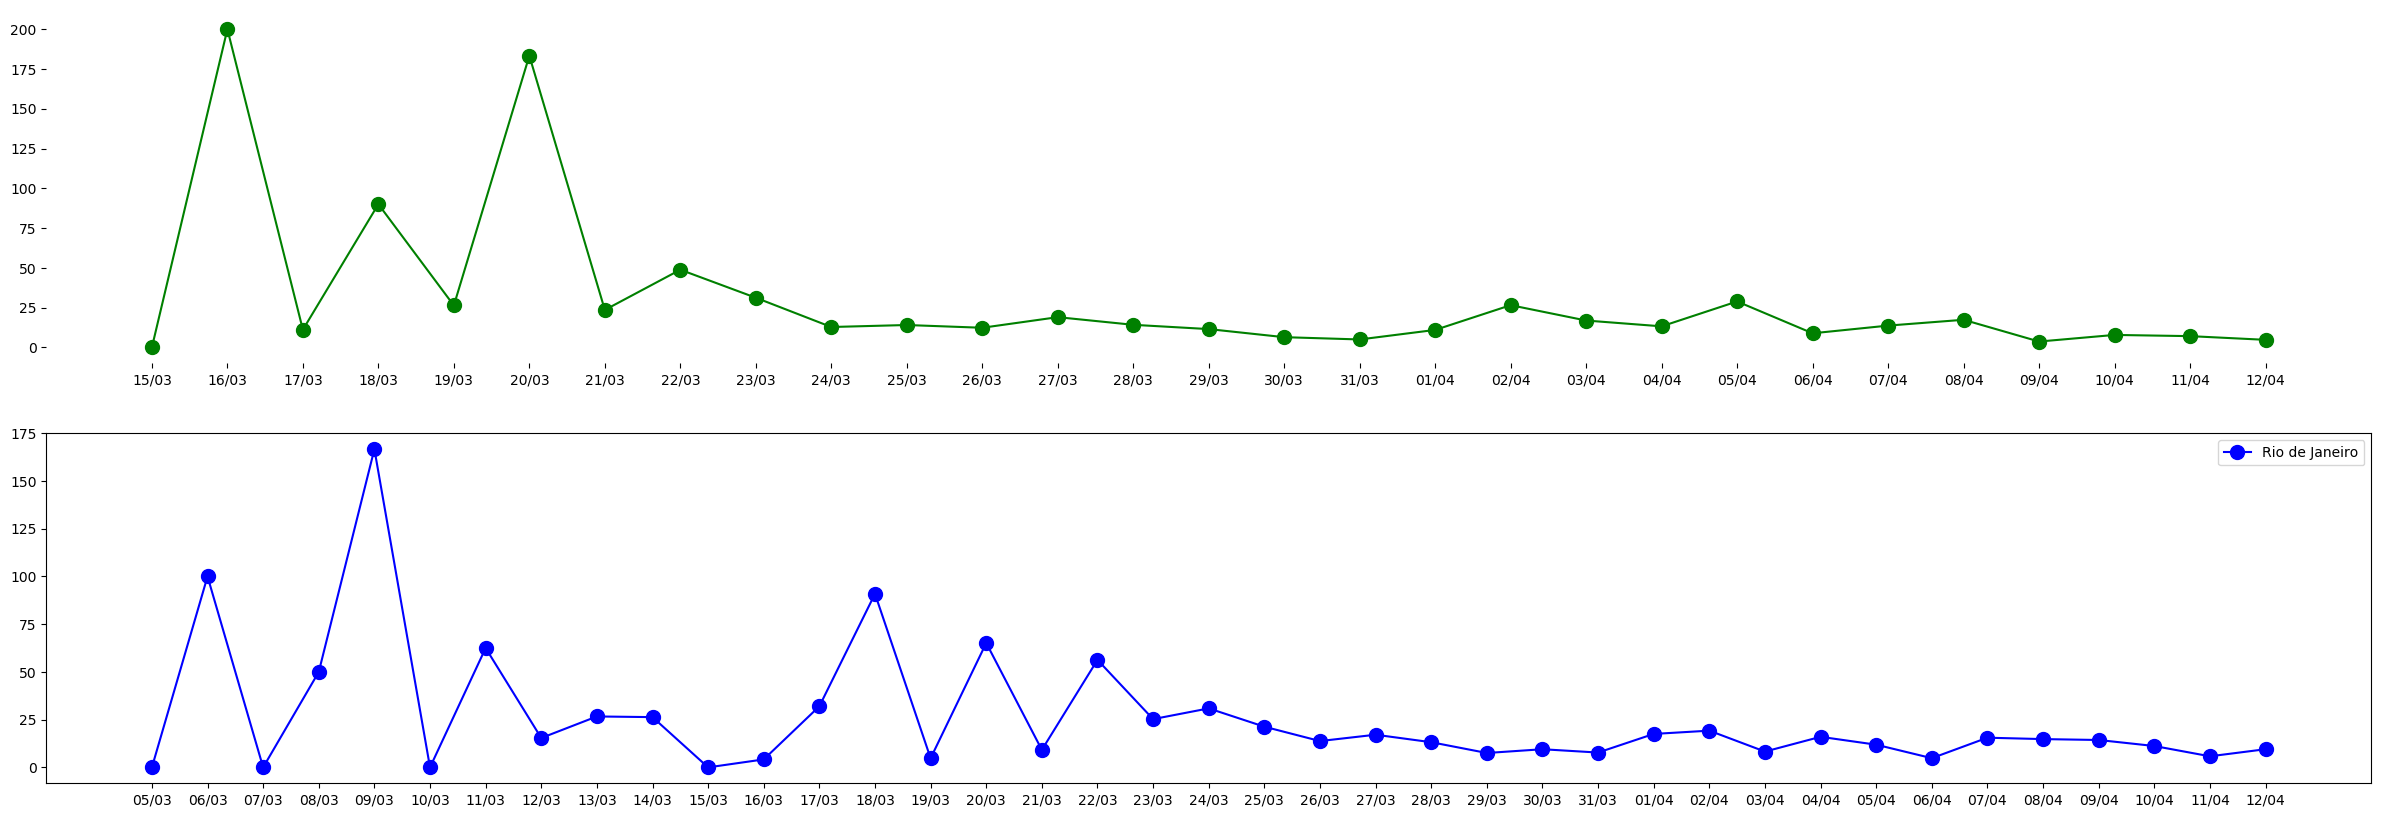

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
dataCE = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataCE)]
casosCE = [float(crescimentoCE[i][3]) for i in range(0, len(crescimentoCE))]

print(casosCE)

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
dataSP = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataSP)]
casosSP = [float(crescimentoSP[i][3]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
dataRJ = [r'{}/{}'.format(d,m) for y, m, d in map(lambda x: str(x).split('-'), dataRJ)]
casosRJ = [float(crescimentoRJ[i][3]) for i in range(0, len(crescimentoRJ))]

# Brasil
#dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [dadosBR[i][0] for i in range(0, len(dadosBR))]]
#dataBR = [r'{}/{}'.format(d,m,y) for y, m, d in map(lambda x: str(x).split('-'), dataBR)]
#casosBR = [dadosBR[i][7] for i in range(0, len(dadosBR))]

#print(dataCE)
#print(casosCE)
#print(dataSP)
#print(casosSP)
#print(dataRJ)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(2, figsize=(30,10))

# Linhas horizontais no eixo y
#ax[0][0].yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
#plt.yticks(size = 15)
#plt.xticks(size = 15)

# Definindo textos do título, eixo x e eixo y
#plt.xlabel('Período', size = 15)
#plt.ylabel('Taxa de crescimento (%)', size = 15)
#plt.title('Percentual do crescimento nos casos confirmados de COVID-19 no Ceará', size = 15)

# Inverte eixo-x
ax[0].invert_xaxis()
ax[1].invert_xaxis()

#fig,a =  plt.subplots(2,2)


# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
ax[1].plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
ax[0].plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR[::-1], casosBR[::-1], marker='o', markersize=10, color="indigo", label='Brasil')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)



plt.legend(loc='best')
plt.savefig('foo.png', format='png', dpi=300)
plt.show()

#### 3.6 - Número absoluto de novos casos:

[79.0, 110.0, 113.0, 69.0, 188.0, 165.0, 199.0, 79.0, 87.0, 95.0, 118.0, 44.0, 19.0, 23.0, 37.0, 40.0, 45.0, 26.0, 26.0, 21.0, 39.0, 41.0, 16.0, 44.0, 5.0, 9.0, 1.0, 6.0, 3.0]


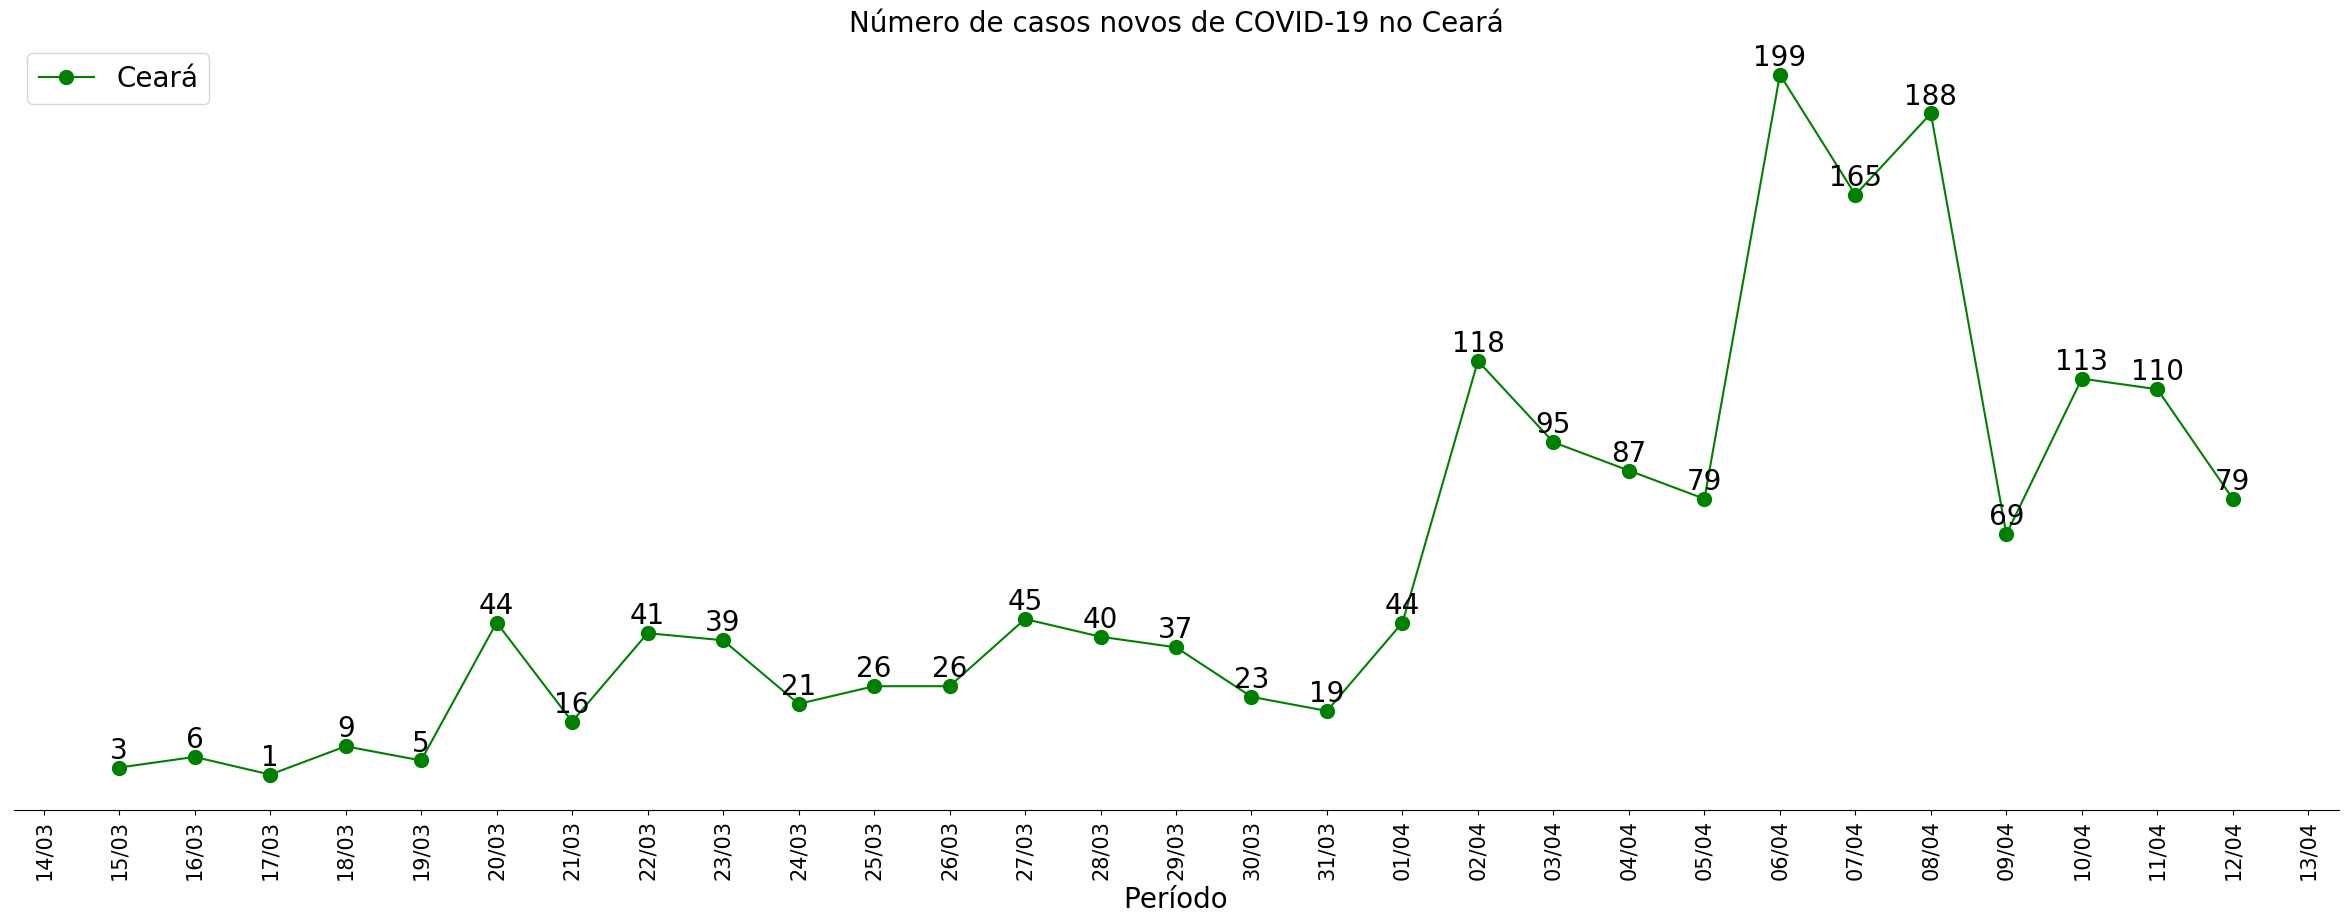

In [76]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
import matplotlib.dates
from time import mktime

# DATAS
#Ceará
crescimentoCE = taxa_crescimento(dadosCE)
crescimentoSP = taxa_crescimento(dadosSP)                       
crescimentoRJ = taxa_crescimento(dadosRJ)


dataCE = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoCE[i][0] for i in range(0, len(crescimentoCE))]]
casosCE = [float(crescimentoCE[i][2]) for i in range(0, len(crescimentoCE))]

# São Paulo
dataSP = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoSP[i][0] for i in range(0, len(crescimentoSP))]]
casosSP = [float(crescimentoSP[i][2]) for i in range(0, len(crescimentoSP))]

# Rio de Janeiro
dataRJ = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoRJ[i][0] for i in range(0, len(crescimentoRJ))]]
casosRJ = [float(crescimentoRJ[i][2]) for i in range(0, len(crescimentoRJ))]

# Brasil
dataBR = [datetime.strptime(date, '%Y-%m-%d').date() for date in [crescimentoBR[i][0] for i in range(0, len(crescimentoBR))]]
casosBR = [float(crescimentoBR[i][2]) for i in range(0, len(crescimentoBR))]

print(casosCE)


# AJUSTANDO TAMANHO DO GRÁFICO
fig, ax = plt.subplots(figsize=(30,10))

# Linhas horizontais no eixo y
#ax.yaxis.grid(which="major", color='k', linestyle='-', linewidth=0.5)

# Aumentar tamanho letras eixo y
plt.yticks(size = 15)
plt.xticks(size = 15)

# Formatar o eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter(r'%d/%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Limite para eixo y
#ax.set_ylim([0,60])

# Definindo textos do título, eixo x e eixo y
plt.xlabel('Período', size = 20)
#plt.ylabel('Número de casos novos', size = 15)
plt.title('Número de casos novos de COVID-19 no Ceará', size = 20)


# Find position of a date in a list
#print(dataBR.index(datetime.strptime("2020-03-15","%Y-%m-%d").date()))

# Plota os dados SP, RJ e CE, respectivamente
#plt.plot(dataSP, casosSP, marker='o', markersize=10, color="red", label='São Paulo')
#plt.plot(dataRJ, casosRJ, marker='o', markersize=10, color="blue", label='Rio de Janeiro')
plt.plot(dataCE, casosCE, marker='o', markersize=10, color="green", label='Ceará')
#plt.plot(dataBR, casosBR, marker='o', markersize=10, color="indigo", label='Brasil')



# Mostrar valores dos pontos do eixo Y para o Ceará
for i,j in zip(dataCE,casosCE):
    ax.annotate(str(int(j)),xy=(i,j+5), ha="center", va="center", size=20)

'''
# Mostrar valores dos pontos do eixo Y para no BR
for i,j in zip(dataBR,casosBR):
    ax.annotate(str(j),xy=(i,j+3), size=17)

'''

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

ax.tick_params(axis='x', rotation=90)





plt.legend(loc='upper left', prop={"size":20})
plt.savefig('foo.png', format='png', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()